In [ ]:
!pip install  -q transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install  git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS
!pip install -q nltk

In [1]:
import torch
from transformers import BitsAndBytesConfig,pipeline

In [6]:

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [7]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [11]:
Pipe = pipeline(
    "image-to-text",
    model=model_id,
    tokenizer=model_id,
     model_kwargs={"quantization_config": quantization_config})


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [12]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
from PIL import Image

In [13]:
Pipe

In [14]:
image_path = "1.jpg"


In [17]:
image = Image.open(image_path)

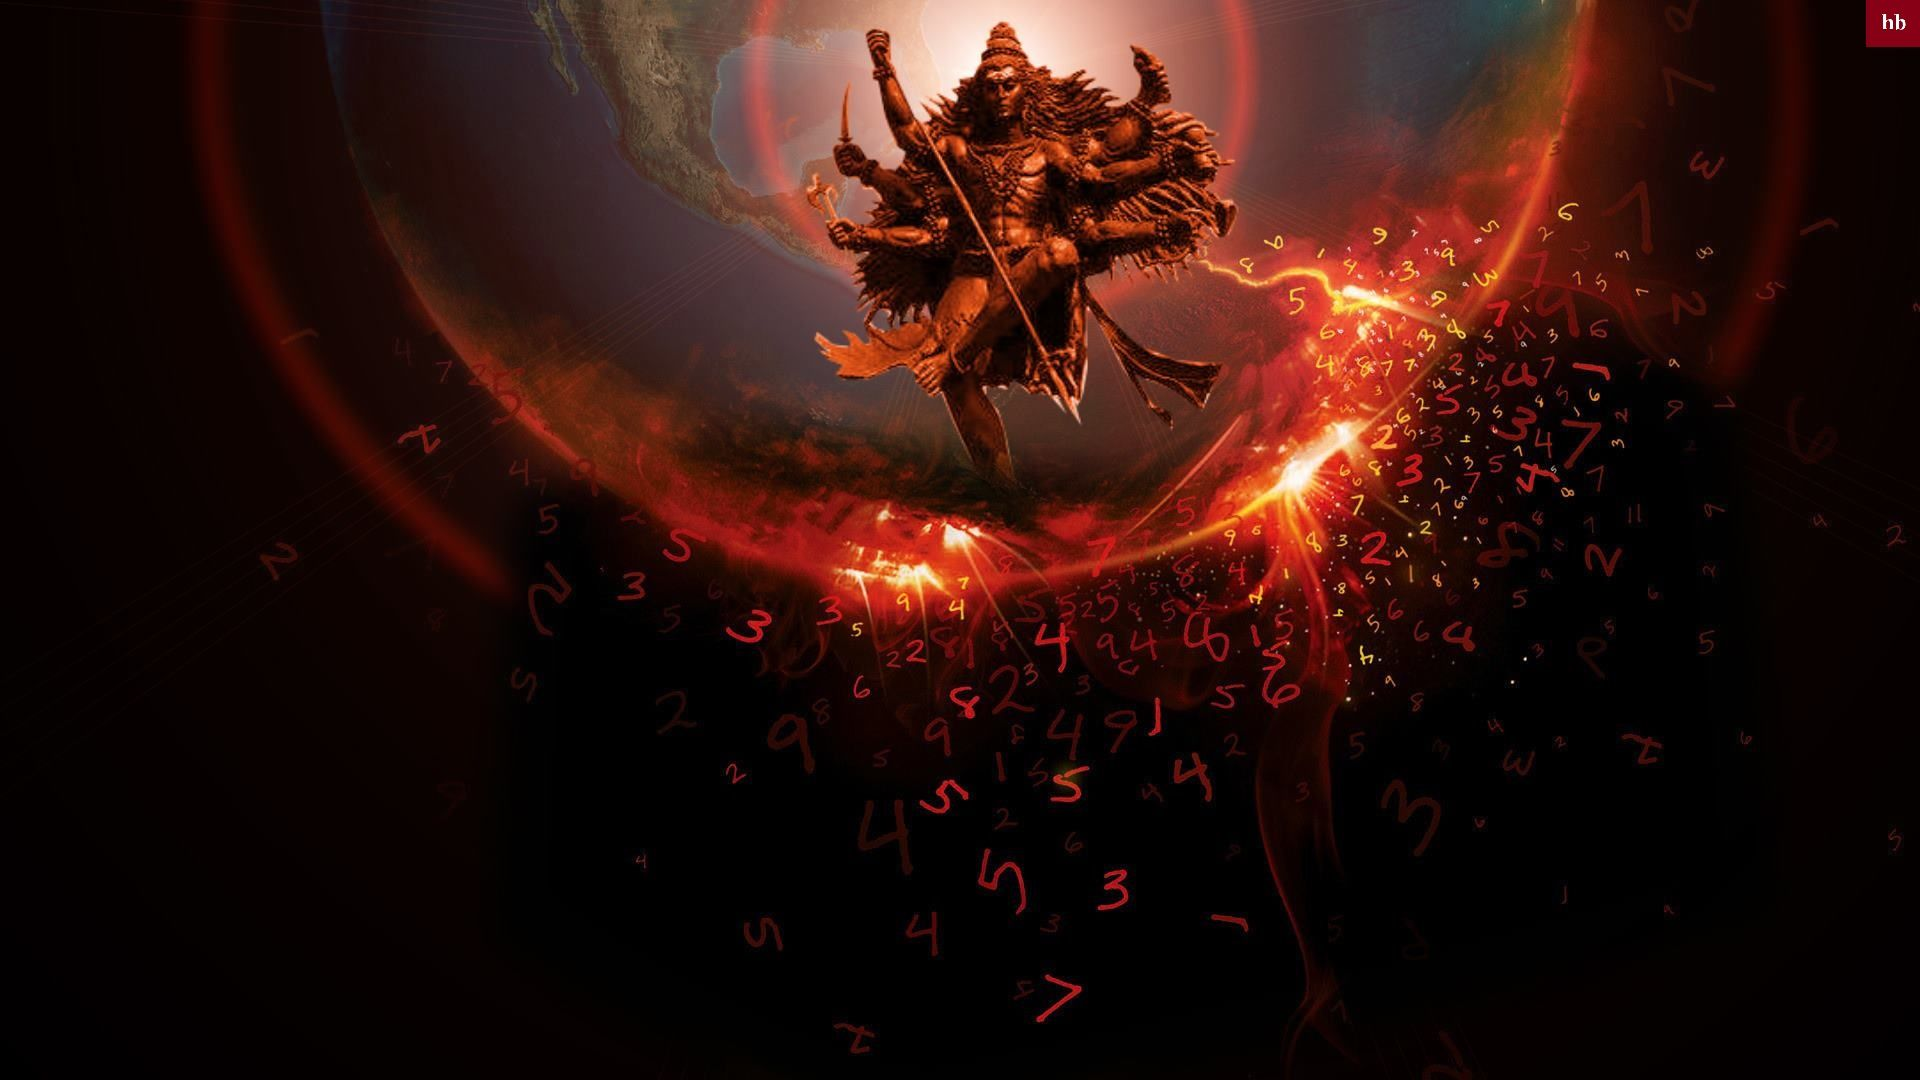

In [18]:
image

In [19]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
max_new_tokens = 300

In [21]:
prompt_instruction ="""
You area helpful AI assistant who has the capability to extract data from the image and you are able to
answer questions about images.You are capable to describe a image as detailed as possible.
What is the image all about?
Now genearte the helpful answer"""

In [22]:
prompt = "User: <image> \n "+ prompt_instruction + "\nAssistant:"

In [23]:
generate_kwargs = {"max_new_tokens": max_new_tokens}

In [24]:
outputs = Pipe(image, prompt=prompt, generate_kwargs=generate_kwargs)

In [25]:
print(outputs)

[{'generated_text': 'User:   \n \nYou area helpful AI assistant who has the capability to extract data from the image and you are able to\nanswer questions about images.You are capable to describe a image as detailed as possible.\nWhat is the image all about?\nNow genearte the helpful answer\nAssistant: The image features a colorful and vibrant scene with a man in the center, possibly a deity or a character from a mythological story. The man is surrounded by a number of other figures, some of which are also holding weapons. The scene is set against a backdrop of a globe, which adds to the overall atmosphere of the image. The man in the center appears to be the focal point of the scene, and his presence adds a sense of drama and intrigue to the image.'}]


In [4]:
for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

NameError: name 'sent_tokenize' is not defined

In [1]:
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

In [2]:
import numpy as np

In [3]:
torch.cuda.is_available()

NameError: name 'torch' is not defined

In [30]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [31]:
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.2.1+cu121 (cuda)


In [32]:
import whisper

In [ ]:
model = whisper.load_model("medium",device=DEVICE)

100%|█████████████████████████████████████| 1.42G/1.42G [00:20<00:00, 74.9MiB/s]
